In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [32]:
sensor_data = pd.read_csv('sensor_data.csv', encoding='latin1')
plan_efficiency_data = pd.read_csv('plant_ton_efficiency.csv')

merged_data = pd.merge(sensor_data, plan_efficiency_data, on='Time', how='outer')

print("Missing values in merged data:")
print(merged_data.isnull().sum())

merged_data.fillna(merged_data.mean(numeric_only=True), inplace=True)

merged_data['Time'] = pd.to_datetime(merged_data['Time'], errors='coerce')

#X = merged_data[['DeltaCDW','Precent_CT', 'CHWR', 'CDHI','GPM','CHWS']]
X = merged_data[['GPM', 'DeltaCHW', 'WBT_C', 'RH [%]', 'kW_Tot']]
y = merged_data['CH Load']

print("Missing values in features (X):")
print(X.isnull().sum())
print("Missing values in target variable (y):")
print(y.isnull().sum())

#corr_matrix = merged_data[['DeltaCDW','Precent_CT', 'CHWR', 'CDHI', 'CH Load','GPM','CHWS']].corr()
corr_matrix = merged_data[['GPM', 'DeltaCHW', 'WBT_C', 'RH [%]', 'kW_Tot', 'CH Load']].corr()
print("Correlation matrix:")
print(corr_matrix['CH Load'].sort_values(ascending=False))

Missing values in merged data:
Time                    0
RH [%]              13332
Temperature [°C]    13332
WBT_C               13332
RT                  13247
kW_Tot              13247
kW_RT               13247
CH Load             13247
CH1                 13247
CH2                 13247
CH3                 13247
CH4                 13247
kW_CHH              13247
kW_CHP              13247
kW_CHS              13247
kW_CDS              13247
kW_CT               13247
GPM                 13247
DeltaCHW            13247
CHWS                13247
CHWR                13247
DeltaCDW            13247
CDHI                13247
CDLO                13247
WBT                 13247
DeltaCT             13247
Hz_ CHP             13247
Hz_CHS              13247
Hz_CDS              13247
Hz_CT               13247
Precent_CH          13247
Precent_ CHP        13247
Precent_CDS         13247
Precent_CT          13247
dtype: int64
Missing values in features (X):
GPM         0
DeltaCHW    0
WBT_C       

C:\Users\Dell\AppData\Local\Temp\ipykernel_6380\802830081.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Time'] = pd.to_datetime(merged_data['Time'], errors='coerce')


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f'Decision Tree MSE: {mse_tree}')
print(f'Decision Tree R-squared: {r2_tree}')

Decision Tree MSE: 0.7975643342443259
Decision Tree R-squared: 0.9957922581476892


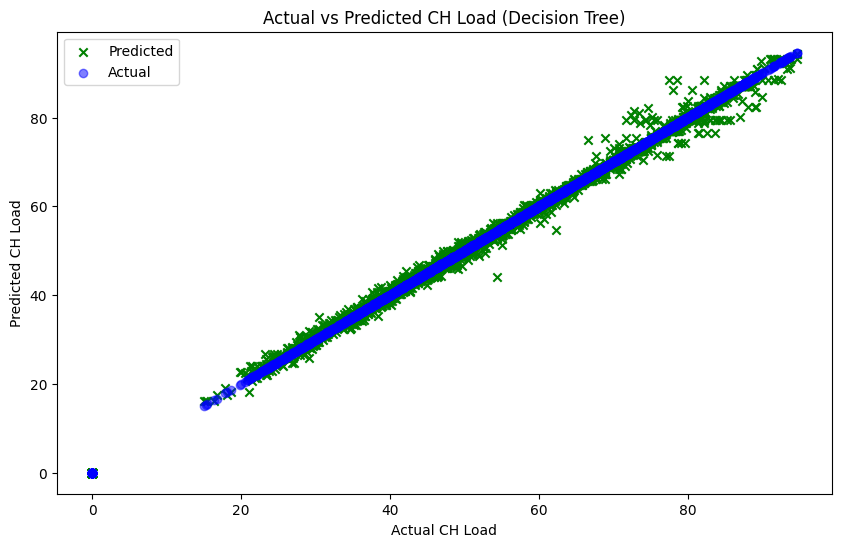

C:\Users\Dell\AppData\Local\Temp\ipykernel_6380\3938604156.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


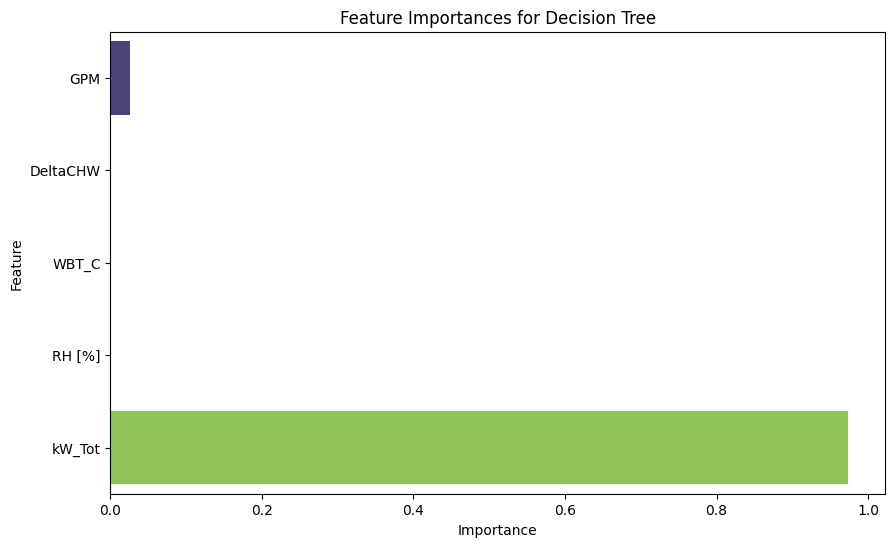

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', marker='x', label='Predicted')
plt.scatter(y_test, y_test, color='blue', marker='o', label='Actual', alpha=0.5)
plt.xlabel('Actual CH Load')
plt.ylabel('Predicted CH Load')
plt.title('Actual vs Predicted CH Load (Decision Tree)')
plt.legend()
plt.show()

feature_importances = tree_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title('Feature Importances for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [35]:
print("Enter values for prediction:")
print("Summary of training data:")
print(X_train.describe())

user_inputs = {}
for column in X_train.columns:
    min_val = X_train[column].min()
    max_val = X_train[column].max()
    user_input_value = float(input(f"Enter value for {column} (range {min_val} - {max_val}): "))

    if user_input_value < min_val or user_input_value > max_val:
        print(f"Warning: {column} value {user_input_value} is out of training range.")
    
    user_inputs[column] = user_input_value

user_input_df = pd.DataFrame([user_inputs])

print("User Input DataFrame:")
print(user_input_df)

predicted_ch_load = tree_model.predict(user_input_df)
print(f"Predicted CH Load: {predicted_ch_load[0]}")

Enter values for prediction:
Summary of training data:
                GPM      DeltaCHW         WBT_C        RH [%]        kW_Tot
count  21263.000000  21263.000000  21263.000000  21263.000000  21263.000000
mean    1318.227734      5.457555     27.954726     70.082821    266.924265
std      128.639162      1.086664      0.942405      4.587252     49.810889
min        0.000000      0.800000     22.900000     41.700000     24.200000
25%     1317.699595      5.457231     27.954646     69.900000    265.500000
50%     1317.699595      5.457231     27.954646     70.078523    266.859511
75%     1339.000000      5.600000     27.954646     70.078523    266.859511
max     1503.300000     10.400000     31.700000     94.900000    431.900000


Enter value for GPM (range 0.0 - 1503.3):  1238
Enter value for DeltaCHW (range 0.8 - 10.4):  3.9
Enter value for WBT_C (range 22.9 - 31.7):  26.1
Enter value for RH [%] (range 41.7 - 94.9):  68.4
Enter value for kW_Tot (range 24.2 - 431.9):  208.7


User Input DataFrame:
      GPM  DeltaCHW  WBT_C  RH [%]  kW_Tot
0  1238.0       3.9   26.1    68.4   208.7
Predicted CH Load: 40.92916666666667
